# YOLO Model Training
### In this python notebook, we train the YOLO v8 model on the provided traffic dataset. Achieving this will go in the following workflow:
change this image for a better one in the future

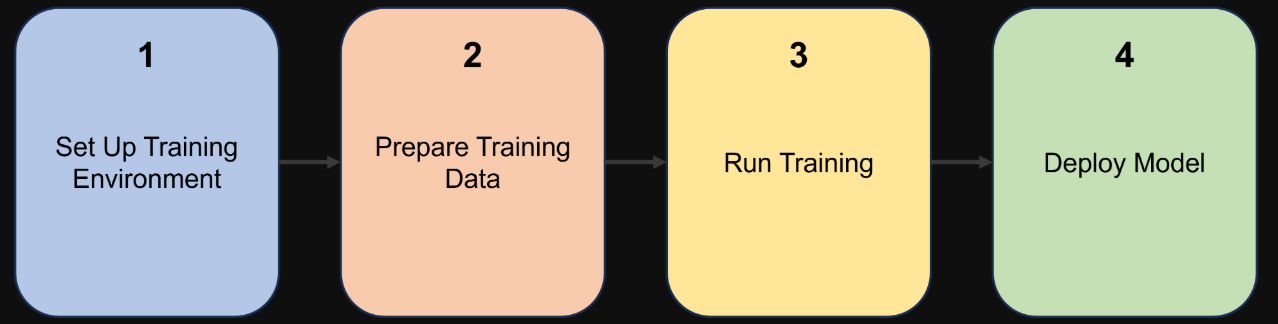
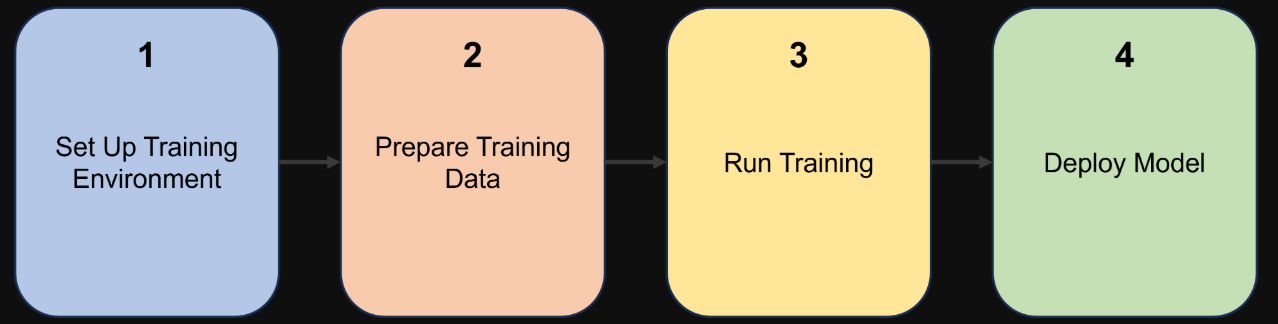

## Importing Libraries
Code to import libraries and get the dataset. We'll be using the ultralytics library for training and running YOLO model.

In [ ]:
!pip install ultralytics
import cv2
import numpy as np

import ultralytics
from ultralytics import YOLO

import PIL.Image as Image
import os

In [ ]:
path_project_folder = '/kaggle/working/'   ## change this path to your project folder path
#os.chdir(path_project_folder)

path_dataset1_config = '/kaggle/input/yolo-dataset/dataset_1/dataset_1/data.yaml'  #path for the configuration files of the datasets
path_dataset2_config = '/kaggle/input/yolo-dataset/dataset_2/dataset_2/data.yaml'
path_dataset3_config = '/kaggle/input/yolo-dataset/dataset_3/dataset_3/data.yaml'

## Training the model

### NOTE:
The dataset was split into 3 parts to facilitate the training, and to satisfy compute constraints.

In [ ]:
model = YOLO('yolov8s.pt')
model.train(data = path_dataset1_config ,epochs =40)

In [ ]:
path_partially_trained_model = os.path.join(path_project_folder,'runs/detect/train/weights/best.pt')  # if you retrained the model then provide the correct train folder path here

In [ ]:
model = YOLO(path_partially_trained_model)

In [ ]:
model.train(data = path_dataset2_config,epochs =30, lr0 = 0.00714, lrf= 0.0116,momentum = 0.87808 ,weight_decay = 0.00053,warmup_epochs =2.52312,warmup_momentum=0.5596) ## these values are based on the values obtained in above hyperparameter tuning

In [ ]:
path_partially_trained_model_2 = os.path.join(path_project_folder,'runs/detect/train2/weights/best.pt')  # if you retrained the model then provide the correct train folder path here

In [ ]:
model = YOLO(path_partially_trained_model_2)

In [ ]:
model.train(data = path_dataset3_config,epochs =30, lr0 = 0.00714, lrf= 0.0116,momentum = 0.87808 ,weight_decay = 0.00053,warmup_epochs =2.52312,warmup_momentum=0.5596) ## these values are based on the values obtained in above hyperparameter tuning

## Hyperparameter Tuning
Next, we perform the Hyperparameter Tuning of the model.

In [ ]:
model.tune(data= path_dataset1_config , epochs=30, iterations=10, optimizer='AdamW', plots=True, save=True, val=False)